In [1]:
import pandas as pd

# Read the Parquet file
df = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet', engine='pyarrow')  # or engine='fastparquet'

# Display the DataFrame
print(df)

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...  


In [2]:
import pandas as pd

# Set Pandas options to display more data
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.max_colwidth', None)  # Display full content in each column

# Assuming your DataFrame is already loaded
print(df)  # or df.head() if you just want the top few rows

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                                                                                                        Attribute_list  
0                                                                         [color, neck, pattern, print_or_pattern_type, sleeve_length]  
1  [blouse_pattern, border, border_width, color, occasion, ornamentation, pallu_details, pattern, print_or_pattern_type, transparency]  
2                   [color, fit_shape, length, occasion, ornamentation, pattern, print_or_pattern_type, sleeve_length, sleeve_styling]  
3                           [color, fit_shape, length, pattern, print_or_pattern_type, sleeve_length, sleeve_styling, surface_styling]  
4    [color, fit_shape, length, neck_collar, ocassion, p

# **Correcting just Women Tops & Tunics data**

Loaded csv file.
   id     Category  len      attr_1 attr_2   attr_3   attr_4         attr_5  \
0   0  Men Tshirts    5     default  round  printed  default  short sleeves   
1   1  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
2   2  Men Tshirts    5     default   polo    solid    solid  short sleeves   
3   3  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   
4   4  Men Tshirts    5  multicolor   polo    solid    solid  short sleeves   

  attr_6 attr_7 attr_8 attr_9 attr_10  
0    NaN    NaN    NaN    NaN     NaN  
1    NaN    NaN    NaN    NaN     NaN  
2    NaN    NaN    NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN     NaN  


/tmp/ipykernel_30/890738501.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  return plt.cm.get_cmap('hsv', n)(range(n))  # Generate unique colors if categories exceed standard colors


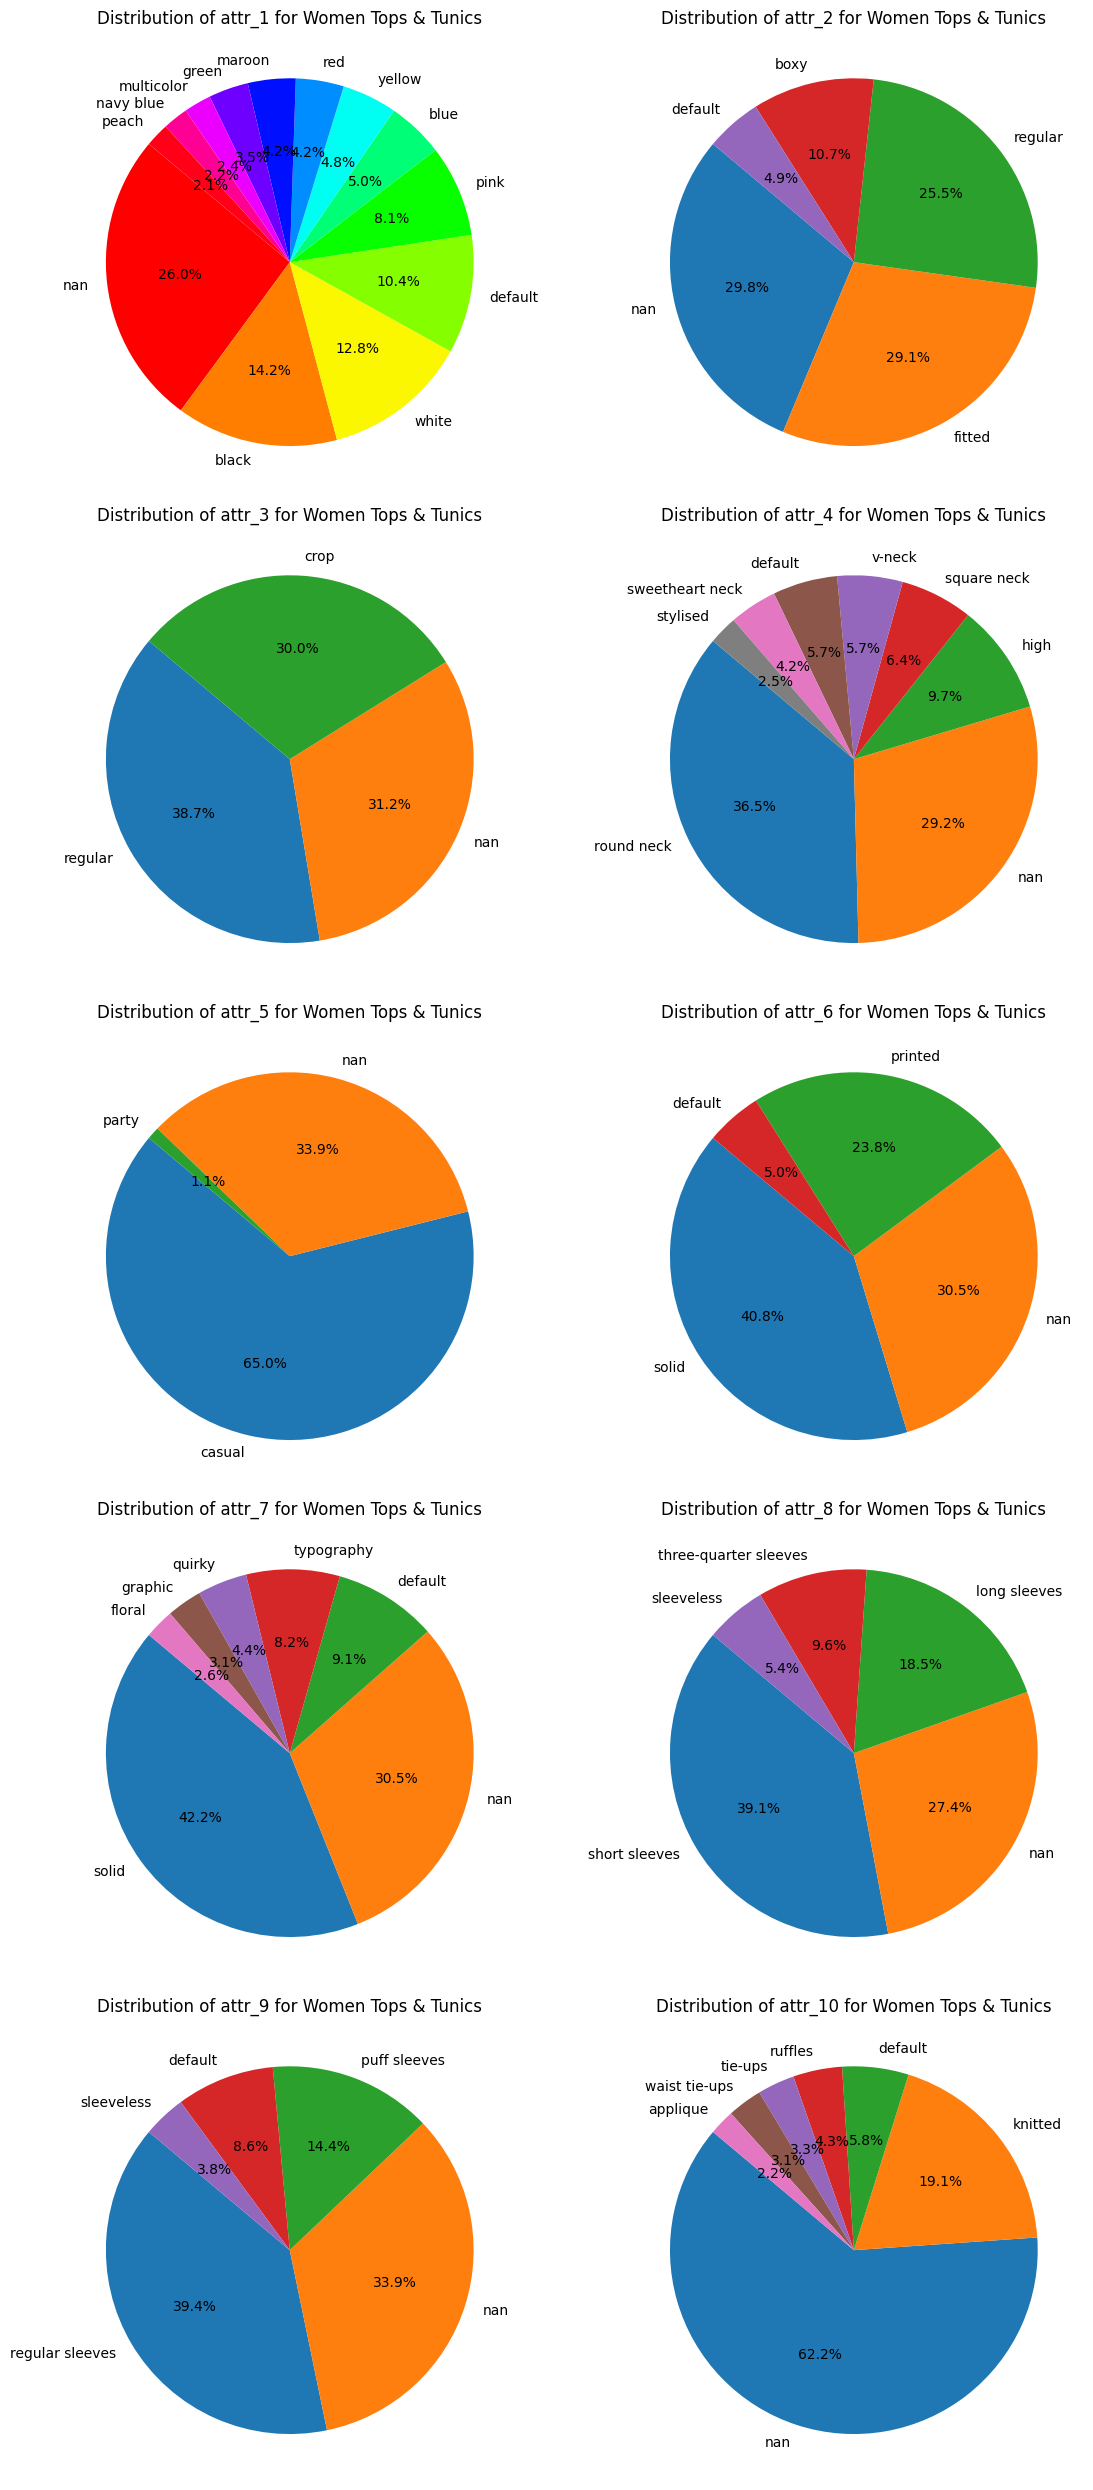

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors

# Load the data
data = pd.read_csv('/kaggle/input/visual-taxonomy/train.csv')
print("Loaded csv file.")
print(data.head())

# Specify the target category
target_category = "Women Tops & Tunics"

# Filter data to include only the specified category
filtered_data = data[data['Category'] == target_category]

# Function to generate a unique color map based on the number of categories in a column
def generate_colors(n):
    color_list = list(mcolors.TABLEAU_COLORS)  # Use Tableau colors for variety
    if n <= len(color_list):
        return color_list[:n]
    else:
        return plt.cm.get_cmap('hsv', n)(range(n))  # Generate unique colors if categories exceed standard colors

# Loop through each column in the filtered data to generate pie charts
columns_to_plot = [column for column in filtered_data.columns if column not in ['id', 'Category','len']]
num_attributes = len(columns_to_plot)  # Calculate number of attributes to plot
num_rows = (num_attributes + 1) // 2  # Calculate number of rows needed (2 columns)

# Create a figure with a 2-column grid
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column to generate pie charts
for i, column in enumerate(columns_to_plot):
    # Calculate value counts for the column, including missing values
    value_counts = filtered_data[column].value_counts(dropna=False)
    if value_counts.isnull().any():
        value_counts.index = value_counts.index.fillna('Missing')  # Label missing values as 'Missing'

    # Generate a unique color map for each pie chart
    colors = generate_colors(len(value_counts))

    # Plot pie chart on the corresponding axes
    axes[i].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f"Distribution of {column} for {target_category}")

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import os

# Load and preprocess the data
train_csv_path = '/kaggle/input/visual-taxonomy/train.csv'
train_img_dir = '/kaggle/input/visual-taxonomy/train_images/'

# Load the labels from train.csv
data = pd.read_csv(train_csv_path)

# Filter data for "Men Tshirts" category and select the first 8 columns for attributes
target_category = "Women Tops & Tunics"
df = data[data['Category'] == target_category]

df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))
df = df.drop(['Category','len'], axis=1)
df.rename(columns={'attr_1': 'color', 'attr_2': 'fit_shape','attr_3': 'length','attr_4': 'neck_collar','attr_5': 'occasion','attr_6': 'pattern','attr_7': 'print_or_pattern_type','attr_8': 'sleeve_length','attr_9': 'sleeve_styling','attr_10': 'surface_styling'}, inplace=True)
# df = df.fillna('dummy_value')
# df = df.dropna()
print("Done")

Done


/tmp/ipykernel_30/3734118382.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['image_path'] = df['id'].apply(lambda x: os.path.join(train_img_dir, f"{x:06d}.jpg"))


In [5]:
df.head()

,id,color,fit_shape,length,neck_collar,occasion,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling,image_path
51209,51375,black,regular,NaN,NaN,NaN,NaN,NaN,NaN,regular sleeves,NaN,/kaggle/input/visual-taxonomy/train_images/051375.jpg
51210,51376,navy blue,fitted,crop,high,casual,default,solid,short sleeves,default,knitted,/kaggle/input/visual-taxonomy/train_images/051376.jpg
51211,51377,red,regular,regular,round neck,casual,printed,typography,sleeveless,sleeveless,NaN,/kaggle/input/visual-taxonomy/train_images/051377.jpg
51212,51378,default,fitted,crop,stylised,casual,solid,solid,short sleeves,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/051378.jpg
51213,51379,default,boxy,regular,round neck,casual,printed,typography,short sleeves,default,NaN,/kaggle/input/visual-taxonomy/train_images/051379.jpg


In [6]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                           0
color                     4946
fit_shape                 5667
length                    5938
neck_collar               5553
occasion                  6437
pattern                   5787
print_or_pattern_type     5788
sleeve_length             5207
sleeve_styling            6433
surface_styling          11823
image_path                   0
dtype: int64


In [7]:
df.shape

(19004, 12)

**Good Chunk of data is missing. So let us try to impute certain values there using models**

In [8]:
train_df=df

In [9]:
# Function to load and preprocess image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    return img_array

# Example function to create a CNN-based model for imputation
def create_imputer_model(output_classes):
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze backbone for initial training
    
    model = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(output_classes, activation='softmax')
    ])
    
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'fit_shape', 'length', 'neck_collar', 'occasion', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']

# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    
    # Fit and transform only non-missing values
    non_missing = train_df[col].dropna()
    train_df.loc[train_df[col].notna(), col] = le.fit_transform(non_missing)
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))
    
    # Ensure missing values are restored as NaN in the DataFrame
    train_df[col] = train_df[col].astype(float)  # Ensure NaN compatibility
    train_df.loc[train_df[col].isnull(), col] = np.nan
    
print("Encoded DataFrame:")
print(train_df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
          id  color  fit_shape  length  neck_collar  occasion  pattern  \
51209  51375    0.0        3.0     NaN          NaN       NaN      NaN   
51210  51376    6.0        2.0     0.0          1.0       0.0      0.0   
51211  51377    9.0        3.0     1.0          2.0       0.0      1.0   
51212  51378    2.0        2.0     0.0          4.0       0.0      2.0   
51213  51379    2.0        0.0     1.0          2.0       0.0      1.0   

       print_or_pattern_type  sleeve_length  sleeve_styling  surface_styling  \
51209                    NaN            NaN             2.0              NaN   
51210                    4.0            1.0             0.0              2.0   
51211                    5.0            2.0             3.0              NaN   
51212                    4.0            1.0             2.0              1.0   
51213                    5.0            1.0             0.0              NaN   

                                                  image

In [11]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
from tensorflow.keras.backend import clear_session

In [12]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['color', 'fit_shape', 'length', 'neck_collar']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

triggered
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


I0000 00:00:1730860460.780078     107 service.cc:145] XLA service 0x7e8fb814b000 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730860460.780133     107 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730860460.780139     107 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  2/200 ━━━━━━━━━━━━━━━━━━━━ 15s 80ms/step - accuracy: 0.0625 - loss: 3.1131 

I0000 00:00:1730860466.431283     107 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 126ms/step - accuracy: 0.3962 - loss: 1.9172 - val_accuracy: 0.6056 - val_loss: 1.1901
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 100ms/step - accuracy: 0.6367 - loss: 1.0706 - val_accuracy: 0.6388 - val_loss: 1.0585
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 20s 102ms/step - accuracy: 0.7321 - loss: 0.8397 - val_accuracy: 0.6925 - val_loss: 0.9864
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.7685 - loss: 0.7085 - val_accuracy: 0.6894 - val_loss: 0.9573
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.7959 - loss: 0.6294 - val_accuracy: 0.7063 - val_loss: 0.9330
Starting prediction for missing values...
Processing batch from 0 to 247
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 830ms/step
Processing batch from 247 to 494
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
Processing batch from 494 to 741
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Processing batch from 741 to 988
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Processing batch from 988 to 1235
8

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['occasion', 'pattern', 'print_or_pattern_type']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

triggered
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 137ms/step - accuracy: 0.9665 - loss: 0.1966 - val_accuracy: 0.9825 - val_loss: 0.0845
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9876 - loss: 0.0609 - val_accuracy: 0.9844 - val_loss: 0.0859
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9865 - loss: 0.0564 - val_accuracy: 0.9819 - val_loss: 0.1058
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9847 - loss: 0.0580 - val_accuracy: 0.9825 - val_loss: 0.0880
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9883 - loss: 0.0413 - val_accuracy: 0.9837 - val_loss: 0.0847
Starting prediction for missing values...
Processing batch from 0 to 321
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 476ms/step
Processing batch from 321 to 642
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
Processing batch from 642 to 963
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Processing batch from 963 to 1284
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Proces

In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Constants for image dimensions and batch size
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32

# For each attribute, filter data, train model, and impute missing values
for attribute in ['sleeve_length', 'sleeve_styling', 'surface_styling']:
    # Filter data for attribute (only rows where this attribute is not missing)
    subset = train_df.dropna(subset=[attribute])
    
    # Limit the number of rows to 10,000 if it exceeds that count
    if len(subset) > 8000:
        subset = subset.sample(n=8000, random_state=42)
        print("triggered")
    
    # Load and preprocess images
    X = np.array([preprocess_image(img_path) for img_path in subset['image_path']])
    y = subset[attribute].values
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize and train the CNN-based model
    model = create_imputer_model(output_classes=len(label_mappings[attribute]))
    model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=BATCH_SIZE)
    
    
    
    # Impute missing values
    missing_subset = train_df[train_df[attribute].isnull()]
    batch_size = len(missing_subset)//20  # Adjust batch size according to available memory

    if not missing_subset.empty:
        print("Starting prediction for missing values...")

        # Initialize an empty list to collect predictions
        y_missing_pred = []

        # Process X_missing in batches
        for start in range(0, len(missing_subset), batch_size):
            end = min(start + batch_size, len(missing_subset))

            print(f"Processing batch from {start} to {end}")

            # Preprocess the images in the current batch
            X_batch = np.array([preprocess_image(img_path) for img_path in missing_subset['image_path'][start:end]])

            # Predict for the current batch
            y_batch_pred = model.predict(X_batch).argmax(axis=1)

            # Append the batch predictions to the main list
            y_missing_pred.extend(y_batch_pred)

    # Convert to numpy array if needed, then update the DataFrame
    y_missing_pred = np.array(y_missing_pred)

    print(f"Predicted: {attribute}")
    train_df.loc[train_df[attribute].isnull(), attribute] = y_missing_pred
        
# Now train the final model on the fully imputed dataset with images and attributes

triggered
Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 134ms/step - accuracy: 0.7043 - loss: 0.8004 - val_accuracy: 0.8725 - val_loss: 0.3841
Epoch 2/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.8926 - loss: 0.3263 - val_accuracy: 0.8888 - val_loss: 0.3536
Epoch 3/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9022 - loss: 0.2817 - val_accuracy: 0.9112 - val_loss: 0.2989
Epoch 4/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 21s 107ms/step - accuracy: 0.9298 - loss: 0.2052 - val_accuracy: 0.9100 - val_loss: 0.3117
Epoch 5/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 22s 108ms/step - accuracy: 0.9381 - loss: 0.1879 - val_accuracy: 0.8825 - val_loss: 0.3475
Starting prediction for missing values...
Processing batch from 0 to 260
9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 605ms/step
Processing batch from 260 to 520
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Processing batch from 520 to 780
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Processing batch from 780 to 1040
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
Processing bat

In [15]:
missing_values = train_df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 id                       0
color                    0
fit_shape                0
length                   0
neck_collar              0
occasion                 0
pattern                  0
print_or_pattern_type    0
sleeve_length            0
sleeve_styling           0
surface_styling          0
image_path               0
dtype: int64


In [16]:
label_mappings

{'color': {0: 'black',
  1: 'blue',
  2: 'default',
  3: 'green',
  4: 'maroon',
  5: 'multicolor',
  6: 'navy blue',
  7: 'peach',
  8: 'pink',
  9: 'red',
  10: 'white',
  11: 'yellow'},
 'fit_shape': {0: 'boxy', 1: 'default', 2: 'fitted', 3: 'regular'},
 'length': {0: 'crop', 1: 'regular'},
 'neck_collar': {0: 'default',
  1: 'high',
  2: 'round neck',
  3: 'square neck',
  4: 'stylised',
  5: 'sweetheart neck',
  6: 'v-neck'},
 'occasion': {0: 'casual', 1: 'party'},
 'pattern': {0: 'default', 1: 'printed', 2: 'solid'},
 'print_or_pattern_type': {0: 'default',
  1: 'floral',
  2: 'graphic',
  3: 'quirky',
  4: 'solid',
  5: 'typography'},
 'sleeve_length': {0: 'long sleeves',
  1: 'short sleeves',
  2: 'sleeveless',
  3: 'three-quarter sleeves'},
 'sleeve_styling': {0: 'default',
  1: 'puff sleeves',
  2: 'regular sleeves',
  3: 'sleeveless'},
 'surface_styling': {0: 'applique',
  1: 'default',
  2: 'knitted',
  3: 'ruffles',
  4: 'tie-ups',
  5: 'waist tie-ups'}}

In [17]:
# Convert float columns to int before mapping
for column, mapping in label_mappings.items():
    train_df[column] = train_df[column].astype(int).map(mapping)

In [18]:
train_df.head()

,id,color,fit_shape,length,neck_collar,occasion,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling,image_path
51209,51375,black,regular,crop,round neck,casual,default,default,short sleeves,regular sleeves,knitted,/kaggle/input/visual-taxonomy/train_images/051375.jpg
51210,51376,navy blue,fitted,crop,high,casual,default,solid,short sleeves,default,knitted,/kaggle/input/visual-taxonomy/train_images/051376.jpg
51211,51377,red,regular,regular,round neck,casual,printed,typography,sleeveless,sleeveless,applique,/kaggle/input/visual-taxonomy/train_images/051377.jpg
51212,51378,default,fitted,crop,stylised,casual,solid,solid,short sleeves,regular sleeves,default,/kaggle/input/visual-taxonomy/train_images/051378.jpg
51213,51379,default,boxy,regular,round neck,casual,printed,typography,short sleeves,default,default,/kaggle/input/visual-taxonomy/train_images/051379.jpg


# **Checking model accuracy after imputation**

In [19]:
df=train_df

In [20]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store mappings for each categorical column
label_mappings = {}
categorical_columns = ['color', 'fit_shape', 'length', 'neck_collar', 'occasion', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']
# Loop over each categorical column, encode, and store mapping
for col in categorical_columns:
    le = LabelEncoder()
    # Fit and transform the column to integer codes
    df[col] = le.fit_transform(df[col])
    
    # Store the mapping of classes to integer labels
    label_mappings[col] = dict(enumerate(le.classes_))

print("Encoded DataFrame:")
print(df.head())
print("\nLabel Mappings:")
print(label_mappings)

Encoded DataFrame:
          id  color  fit_shape  length  neck_collar  occasion  pattern  \
51209  51375      0          3       0            2         0        0   
51210  51376      6          2       0            1         0        0   
51211  51377      9          3       1            2         0        1   
51212  51378      2          2       0            4         0        2   
51213  51379      2          0       1            2         0        1   

       print_or_pattern_type  sleeve_length  sleeve_styling  surface_styling  \
51209                      0              1               2                2   
51210                      4              1               0                2   
51211                      5              2               3                0   
51212                      4              1               2                1   
51213                      5              1               0                1   

                                                  image

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Split the data for training and validation
train_df, val_df = train_test_split(df, test_size=0.1, random_state=42)

# Define image parameters
IMG_HEIGHT, IMG_WIDTH = 224, 224  # Standard image size for CNN models
BATCH_SIZE = 32

# Data generator for real-time data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Train and validation data generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'fit_shape', 'length', 'neck_collar', 'occasion', 
           'pattern','print_or_pattern_type','sleeve_length','sleeve_styling', 'surface_styling'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

val_generator = train_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_img_dir,
    x_col='image_path',
    y_col=['color', 'fit_shape', 'length', 'neck_collar', 'occasion', 
           'pattern','print_or_pattern_type','sleeve_length','sleeve_styling', 'surface_styling'],
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='multi_output'
)

def build_model():
    # Shared Backbone
    base_model = tf.keras.applications.ResNet50(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False  # Freeze the backbone initially
    
    # Global feature extractor
    x = layers.GlobalAveragePooling2D()(base_model.output)

    # Attribute-specific heads
    color_head = layers.Dense(128, activation='relu')(x)
    color_head = layers.Dense(num_classes['color'], activation='softmax', name='color')(color_head)
    
    fit_shape_head = layers.Dense(128, activation='relu')(x)
    fit_shape_head = layers.Dense(num_classes['fit_shape'], activation='softmax', name='fit_shape')(fit_shape_head)
    
    length_head = layers.Dense(128, activation='relu')(x)
    length_head = layers.Dense(num_classes['length'], activation='softmax', name='length')(length_head)
    
    neck_collar_head = layers.Dense(128, activation='relu')(x)
    neck_collar_head = layers.Dense(num_classes['neck_collar'], activation='softmax', name='neck_collar')(neck_collar_head)
    
    occasion_head = layers.Dense(128, activation='relu')(x)
    occasion_head = layers.Dense(num_classes['occasion'], activation='softmax', name='occasion')(occasion_head)
    
    pattern_head = layers.Dense(128, activation='relu')(x)
    pattern_head = layers.Dense(num_classes['pattern'], activation='softmax', name='pattern')(pattern_head)
    
    print_or_pattern_type_head = layers.Dense(128, activation='relu')(x)
    print_or_pattern_type_head = layers.Dense(num_classes['print_or_pattern_type'], activation='softmax', name='print_or_pattern_type')(print_or_pattern_type_head)
    
    sleeve_length_head = layers.Dense(128, activation='relu')(x)
    sleeve_length_head = layers.Dense(num_classes['sleeve_length'], activation='softmax', name='sleeve_length')(sleeve_length_head)
    
    sleeve_styling_head = layers.Dense(128, activation='relu')(x)
    sleeve_styling_head = layers.Dense(num_classes['sleeve_styling'], activation='softmax', name='sleeve_styling')(sleeve_styling_head)
    
    surface_styling_head = layers.Dense(128, activation='relu')(x)
    surface_styling_head = layers.Dense(num_classes['surface_styling'], activation='softmax', name='surface_styling')(surface_styling_head)

    # Define the model with updated attribute heads
    model = models.Model(inputs=base_model.input, outputs=[
        color_head, fit_shape_head, length_head, neck_collar_head, occasion_head,
        pattern_head, print_or_pattern_type_head, sleeve_length_head, sleeve_styling_head, surface_styling_head
    ])
    
    return model

# Number of classes for each attribute
num_classes = {
    'color': df['color'].nunique(),
    'fit_shape': df['fit_shape'].nunique(),
    'length': df['length'].nunique(),
    'neck_collar': df['neck_collar'].nunique(),
    'occasion': df['occasion'].nunique(),
    'pattern': df['pattern'].nunique(),
    'print_or_pattern_type': df['print_or_pattern_type'].nunique(),
    'sleeve_length': df['sleeve_length'].nunique(),
    'sleeve_styling': df['sleeve_styling'].nunique(),
    'surface_styling': df['surface_styling'].nunique()
}

# Instantiate and compile the model
model = build_model()

Found 17103 validated image filenames.
Found 1901 validated image filenames.


In [22]:
import tensorflow as tf

def create_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]

            # Labels as a tuple of individual attributes
            labels = (
                row['color'],
                row['fit_shape'],
                row['length'],
                row['neck_collar'],
                row['occasion'],
                row['pattern'],
                row['print_or_pattern_type'],
                row['sleeve_length'],
                row['sleeve_styling'],
                row['surface_styling']
            )
            yield img, labels

    # Set the output signature with separate `tf.TensorSpec` for each attribute
    output_signature = (
        tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32),  # Image shape and dtype
        (
            tf.TensorSpec(shape=(), dtype=tf.int32),  # color
            tf.TensorSpec(shape=(), dtype=tf.int32),  # fit_shape
            tf.TensorSpec(shape=(), dtype=tf.int32),  # length
            tf.TensorSpec(shape=(), dtype=tf.int32),  # neck_collar
            tf.TensorSpec(shape=(), dtype=tf.int32),  # occasion
            tf.TensorSpec(shape=(), dtype=tf.int32),  # pattern
            tf.TensorSpec(shape=(), dtype=tf.int32),  # print_or_pattern_type
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_length
            tf.TensorSpec(shape=(), dtype=tf.int32),  # sleeve_styling
            tf.TensorSpec(shape=(), dtype=tf.int32)   # surface_styling
        )
    )

    # Debugging check for output_signature types
    for i, spec in enumerate(tf.nest.flatten(output_signature)):
        print(f"Checked {i}")
        if not isinstance(spec, tf.TypeSpec):
            print(f"Error: output_signature element at index {i} is not a TypeSpec: {type(spec)}")

    
    # Create the dataset from the generator
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create train and validation datasets
train_dataset = create_dataset(train_df, BATCH_SIZE)
val_dataset = create_dataset(val_df, BATCH_SIZE)


Checked 0
Checked 1
Checked 2
Checked 3
Checked 4
Checked 5
Checked 6
Checked 7
Checked 8
Checked 9
Checked 10
Checked 0
Checked 1
Checked 2
Checked 3
Checked 4
Checked 5
Checked 6
Checked 7
Checked 8
Checked 9
Checked 10


In [23]:
train_dataset = train_dataset.repeat()
val_dataset = val_dataset.repeat()

In [24]:
# Phase 1: Unfreeze the backbone and all layers
for layer in model.layers:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning on the updated dataset
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss={
        'color': 'sparse_categorical_crossentropy',
        'fit_shape': 'sparse_categorical_crossentropy',
        'length': 'sparse_categorical_crossentropy',
        'neck_collar': 'sparse_categorical_crossentropy',
        'occasion': 'sparse_categorical_crossentropy',
        'pattern': 'sparse_categorical_crossentropy',
        'print_or_pattern_type': 'sparse_categorical_crossentropy',
        'sleeve_length': 'sparse_categorical_crossentropy',
        'sleeve_styling': 'sparse_categorical_crossentropy',
        'surface_styling': 'sparse_categorical_crossentropy'
    },
    metrics={
        'color': ['accuracy'],
        'fit_shape': ['accuracy'],
        'length': ['accuracy'],
        'neck_collar': ['accuracy'],
        'occasion': ['accuracy'],
        'pattern': ['accuracy'],
        'print_or_pattern_type': ['accuracy'],
        'sleeve_length': ['accuracy'],
        'sleeve_styling': ['accuracy'],
        'surface_styling': ['accuracy']
    }
)

initial_epochs = 10

history_phase1 = model.fit(
    train_dataset,
    epochs=initial_epochs,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    validation_data=val_dataset,
    validation_steps=len(val_df) // BATCH_SIZE,
    verbose=1
)


Epoch 1/10


I0000 00:00:1730862655.579591     110 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'loop_add_subtract_fusion_38', 20 bytes spill stores, 20 bytes spill loads



534/534 ━━━━━━━━━━━━━━━━━━━━ 321s 477ms/step - color_accuracy: 0.5523 - fit_shape_accuracy: 0.7191 - length_accuracy: 0.8465 - loss: 6.2287 - neck_collar_accuracy: 0.6930 - occasion_accuracy: 0.9793 - pattern_accuracy: 0.8851 - print_or_pattern_type_accuracy: 0.8235 - sleeve_length_accuracy: 0.8113 - sleeve_styling_accuracy: 0.7816 - surface_styling_accuracy: 0.6840 - val_color_accuracy: 0.2897 - val_fit_shape_accuracy: 0.5461 - val_length_accuracy: 0.7389 - val_loss: 10.9376 - val_neck_collar_accuracy: 0.4931 - val_occasion_accuracy: 0.9883 - val_pattern_accuracy: 0.8300 - val_print_or_pattern_type_accuracy: 0.7135 - val_sleeve_length_accuracy: 0.3628 - val_sleeve_styling_accuracy: 0.6748 - val_surface_styling_accuracy: 0.6043
Epoch 2/10
534/534 ━━━━━━━━━━━━━━━━━━━━ 275s 471ms/step - color_accuracy: 0.7988 - fit_shape_accuracy: 0.8472 - length_accuracy: 0.9232 - loss: 2.9707 - neck_collar_accuracy: 0.8668 - occasion_accuracy: 0.9893 - pattern_accuracy: 0.9578 - print_or_pattern_type_a

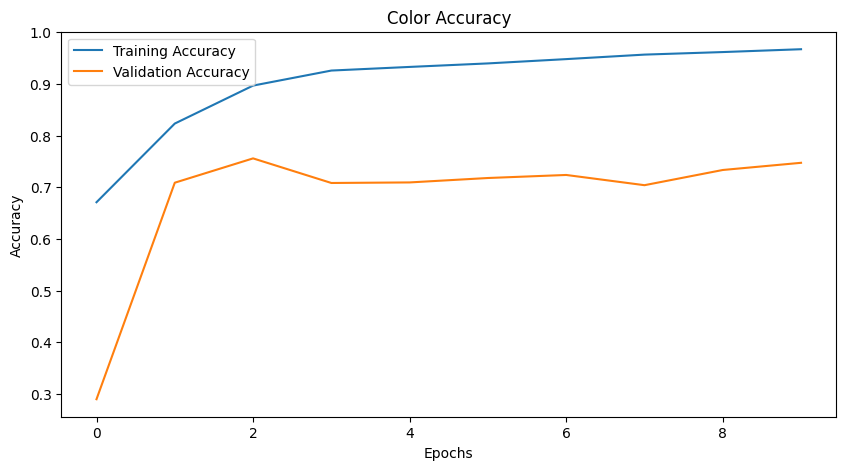

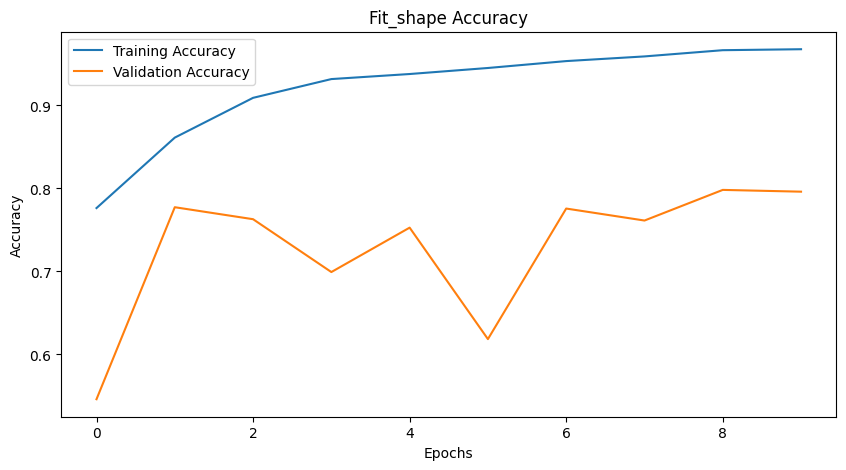

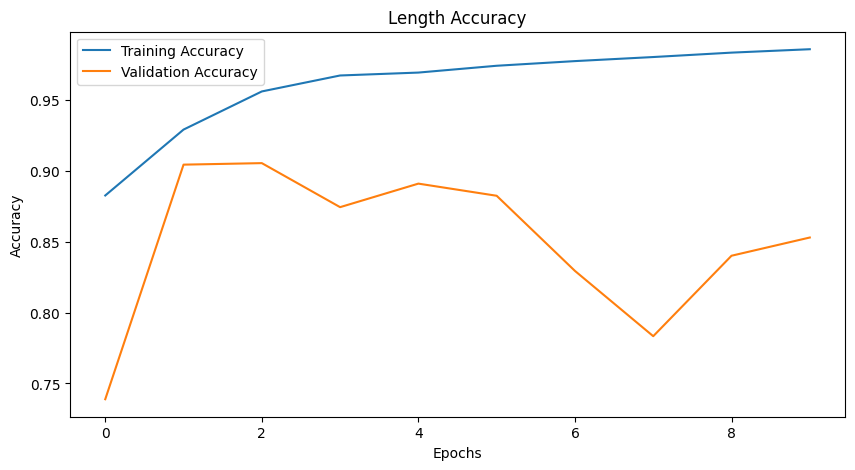

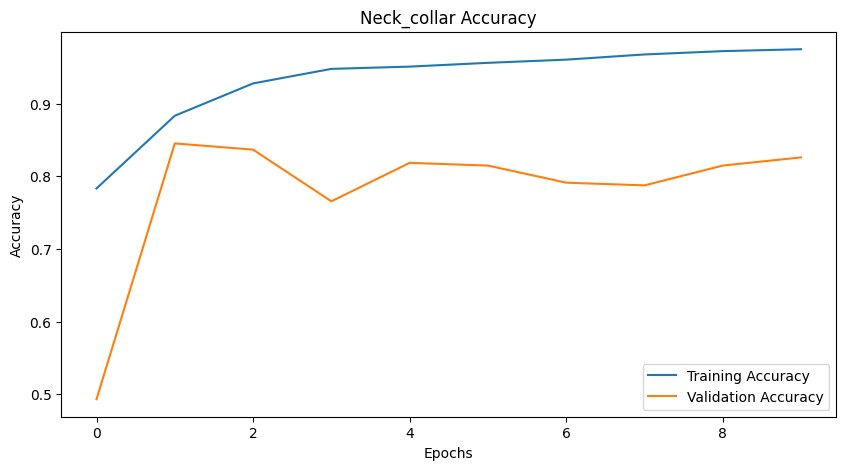

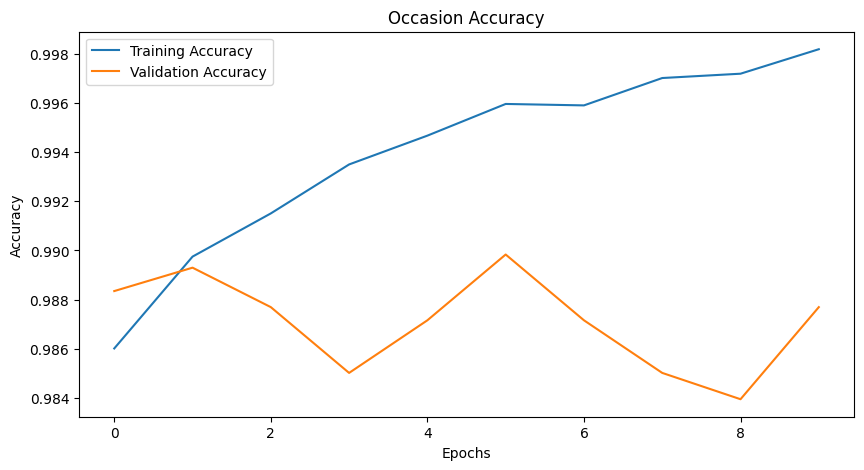

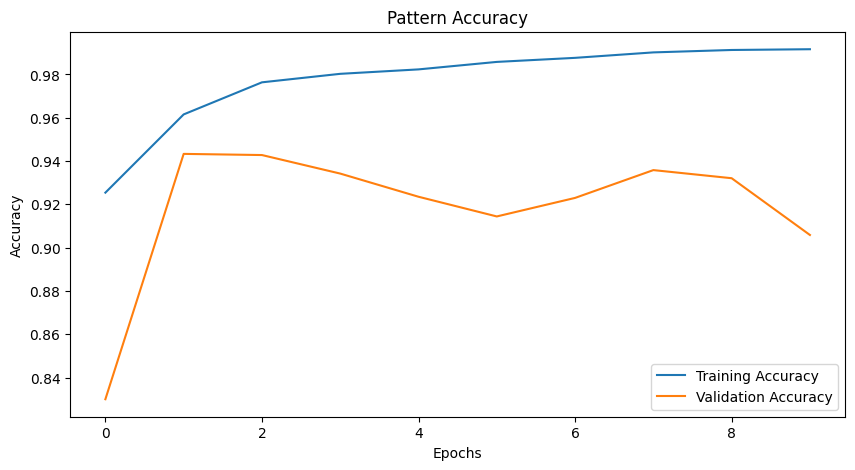

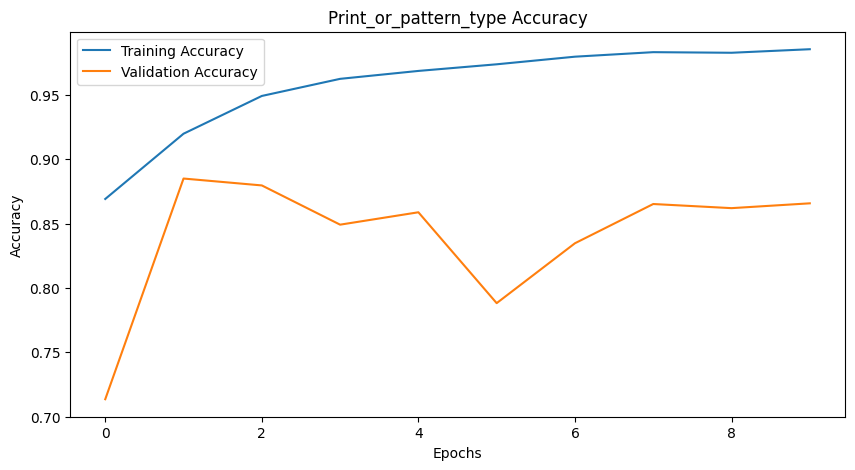

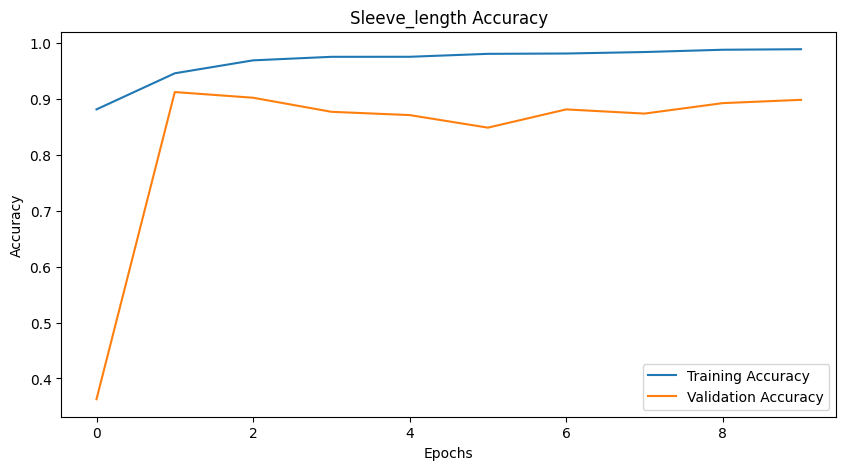

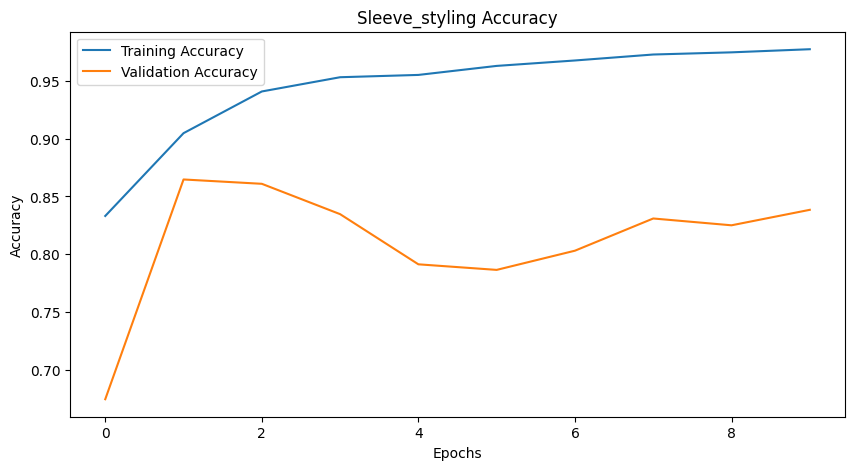

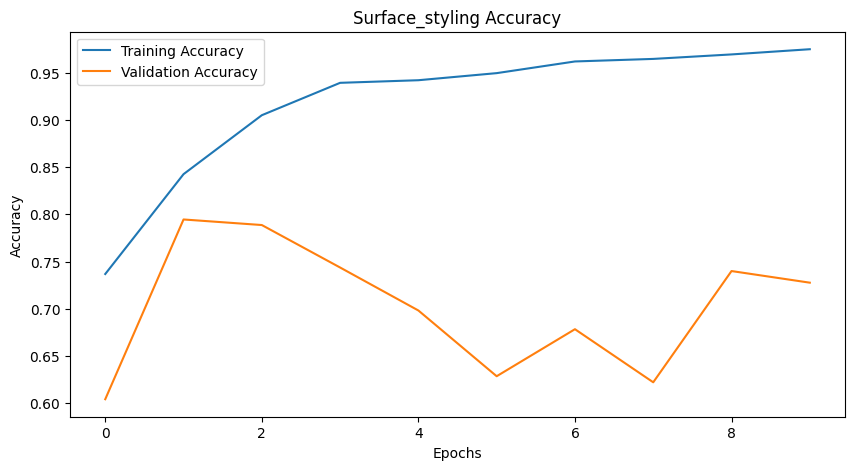

In [25]:
import matplotlib.pyplot as plt

# Define the names for each output
output_names = ['color', 'fit_shape', 'length', 'neck_collar', 'occasion', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']

# Create a plot for each output
for output_name in output_names:
    plt.figure(figsize=(10, 5))
    
    # Plot training accuracy
    plt.plot(history_phase1.history[f'{output_name}_accuracy'], label='Training Accuracy')
    
    # Plot validation accuracy
    plt.plot(history_phase1.history[f'val_{output_name}_accuracy'], label='Validation Accuracy')
    
    # Set plot title and labels
    plt.title(f'{output_name.capitalize()} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Show the plot
    plt.show()

# **Start Test data**

In [26]:
import pandas as pd
import tensorflow as tf

# Load the test.csv and filter for the target category
test_csv_path = '/kaggle/input/visual-taxonomy/test.csv'
test_img_dir = '/kaggle/input/visual-taxonomy/test_images/'

# Load and filter the data
test_data = pd.read_csv(test_csv_path)
test_data = test_data[test_data['Category'] == target_category]

# Create image paths
test_data['image_path'] = test_data['id'].apply(lambda x: os.path.join(test_img_dir, f"{x:06d}.jpg"))

In [27]:
test_data.head()

,id,Category,image_path
23280,23564,Women Tops & Tunics,/kaggle/input/visual-taxonomy/test_images/023564.jpg
23281,23565,Women Tops & Tunics,/kaggle/input/visual-taxonomy/test_images/023565.jpg
23282,23566,Women Tops & Tunics,/kaggle/input/visual-taxonomy/test_images/023566.jpg
23283,23567,Women Tops & Tunics,/kaggle/input/visual-taxonomy/test_images/023567.jpg
23284,23568,Women Tops & Tunics,/kaggle/input/visual-taxonomy/test_images/023568.jpg


In [28]:
# Function to create a dataset from test images
def create_test_dataset(dataframe, batch_size):
    def generator():
        for _, row in dataframe.iterrows():
            # Load and preprocess the image
            img = tf.io.read_file(row['image_path'])
            img = tf.image.decode_jpeg(img, channels=3)
            img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
            img = img / 255.0  # Normalize to [0,1]
            yield img

    output_signature = tf.TensorSpec(shape=(IMG_HEIGHT, IMG_WIDTH, 3), dtype=tf.float32)
    
    # Create the dataset
    dataset = tf.data.Dataset.from_generator(
        generator,
        output_signature=output_signature
    )
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

In [29]:
# Initialize submission DataFrame with columns 'id', 'Category', 'len', and the attribute columns
submission = pd.DataFrame(columns=['id', 'Category', 'len','color', 'fit_shape', 'length','neck_collar', 'occasion', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling'])

# Set 'Category' and 'len' columns
submission['Category'] = target_category
submission['len'] = 10

# Loop over each image in the test data
for index, row in test_data.iterrows():
    # Load and preprocess the image
    img_path = os.path.join(test_img_dir, f"{row['id']:06d}.jpg")
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])
    img = img / 255.0  # Normalize
    img_batch = tf.expand_dims(img, 0)  # Add batch dimension

    # Predict using the model
    predicted_outputs = model.predict(img_batch,verbose=0)

    # Decode predictions using label mappings
    predicted_attributes = []
    for i, col in enumerate(['color', 'fit_shape', 'length','neck_collar', 'occasion', 'pattern', 'print_or_pattern_type', 'sleeve_length', 'sleeve_styling', 'surface_styling']):
        predicted_label_idx = np.argmax(predicted_outputs[i], axis=1)[0]
        predicted_label = label_mappings[col][predicted_label_idx]
        predicted_attributes.append(predicted_label)

    # Append the results to the submission DataFrame
    submission = pd.concat([submission, pd.DataFrame([[row['id'], target_category, 10] + predicted_attributes],
                                                     columns=submission.columns)], ignore_index=True)


In [30]:
submission.head()

,id,Category,len,color,fit_shape,length,neck_collar,occasion,pattern,print_or_pattern_type,sleeve_length,sleeve_styling,surface_styling
0,23564,Women Tops & Tunics,10,black,fitted,crop,high,casual,default,default,sleeveless,sleeveless,knitted
1,23565,Women Tops & Tunics,10,yellow,boxy,crop,round neck,casual,printed,typography,short sleeves,regular sleeves,waist tie-ups
2,23566,Women Tops & Tunics,10,black,fitted,regular,round neck,casual,solid,solid,long sleeves,regular sleeves,applique
3,23567,Women Tops & Tunics,10,peach,regular,regular,v-neck,casual,printed,solid,short sleeves,default,knitted
4,23568,Women Tops & Tunics,10,black,fitted,regular,round neck,casual,default,solid,short sleeves,regular sleeves,knitted


In [32]:
# Rename the columns ['blouse_pattern', 'border', 'border_width', 'color', 'occasion', 
           # 'ornamentation', 'pallu_details', 'pattern', 'print_or_pattern_type', 'transparency']
submission.rename(columns={
    'color': 'attr_1', 
    'fit_shape': 'attr_2', 
    'length': 'attr_3', 
    'neck_collar': 'attr_4', 
    'occasion': 'attr_5',
    'pattern': 'attr_6',
    'print_or_pattern_type': 'attr_7',
    'sleeve_length': 'attr_8',
    'sleeve_styling': 'attr_9',
    'surface_styling': 'attr_10'
}, inplace=True)

# Add columns attr_6 to attr_10 with "dummy_value"
# for i in range(10, 11):
#     submission[f'attr_{i}'] = "dummy_value"

# Save the modified DataFrame to CSV
output_path = "/kaggle/working/submissionTopsAndTunicsFinal.csv"
submission.to_csv(output_path, index=False)

print(f"File saved successfully at {output_path}")


File saved successfully at /kaggle/working/submissionTopsAndTunicsFinal.csv
